In [36]:
import texthero as hero
import pandas as pd
import MeCab

In [37]:
file_path = '../data/livedoornews.csv'
text_column = 'body'
topic_column = 'media'
font_path = '../fonts/NotoSansCJKJP/NotoSansCJKjp-Regular.otf'

In [39]:
# データを読み込む
df = pd.read_csv(file_path)
df.rename(columns={text_column: 'text'}, inplace=True)
df.rename(columns={topic_column: 'topic'}, inplace=True)
df.dropna(how='any', inplace=True)
df = df[['topic', 'text']]
len(df)

7367

In [40]:
# ストップワードを用意する
stop_words = []
for word in open('../dicts/stopwords.txt'):
    word = word.replace('\n', '')
    if word: stop_words.append(word)

stop_words[:10]

['あそこ', 'あたり', 'あちら', 'あっち', 'あと', 'あな', 'あなた', 'あれ', 'いくつ', 'いつ']

In [41]:
# mecabで形態素解析し、指定した品詞の単語のみ抽出した分かち書きを行う関数を用意する
tagger = MeCab.Tagger('')
pos_list = ['名詞', '動詞', '形容詞']

def wakati(text):
    node = tagger.parseToNode(text)
    words = []

    while node:
        pos = node.feature.split(',')[0]
        surface = node.surface
        if pos in pos_list and surface not in stop_words:
            words.append(surface)
        node = node.next
    return ' '.join(words)

In [42]:
# 分かち書きを行う
df['wakati_text'] = df['text'].apply(lambda x: wakati(x))

In [43]:
df

,topic,text,wakati_text
0,movie-enter,2005年11月から翌2006年7月まで読売新聞にて連載された、直木賞作家・角田光代による初...,2005 11 2006 7 読売新聞 連載 れ 直木賞 作家 角田 光代 初 長編 サスペ...
1,movie-enter,「アンテナを張りながら生活をしていけばいい」\n2月28日、映画『おかえり、はやぶさ』（3月...,アンテナ 張り 生活 いけ いい 2 28 映画 ぶさ 3 10 公開 文部 科学 省 タイ...
2,movie-enter,3月2日より全国ロードショーとなる、スティーブン・スピルバーグの待望の監督最新作『戦火の馬』...,3 2 全国 ロードショー なる スティーブン スピルバーグ 待望 監督 最新 戦火 馬 早...
3,movie-enter,女優の香里奈が18日、都内で行われた映画『ガール』（5月26日公開）の女子高生限定試写会にサ...,女優 香里奈 18 都内 行わ れ 映画 ガール 5 26 公開 女子高 生 限定 試写 サ...
4,movie-enter,5日、東京・千代田区の内幸町ホールにて、映画『キャプテン・アメリカ/ザ・ファースト・アベンジ...,5 東京 千代田 内幸町 ホール 映画 キャプテン アメリカ / ザ・ファースト・アベンジャ...
...,...,...,...
7362,smax,どんな戦士を作るかはユーザー次第！\n国民的人気を誇る鳥山明氏のマンガ／アニメである「DRA...,戦士 作る ユーザー 次第 国民 人気 誇る 鳥山 明 氏 マンガ アニメ DRAGON B...
7363,smax,GALAXY SIIIが6月28日、F-09D ANTEPRIMAが6月27日に発売！\nN...,GALAXY SIII 6 28 F - 09 D ANTEPRIMA 6 27 発売 NT...
7364,smax,shimajiro@mobiler\nNTTドコモは、同社の公衆無線LANサービス「doco...,shimajiro @ mobiler NTT ドコモ 同社 公衆 無線 LAN サービス ...
7365,smax,PRADA Phone by LG L-02Dにソフトウェア更新！\nNTTドコモは20日、...,PRADA Phone by LG L - 02 D ソフトウェア 更新 NTT ドコモ 2...


In [44]:
# 前処理を行う
df['wakati_text'] = hero.clean(df['wakati_text'], pipeline=[
    hero.preprocessing.fillna,
    hero.preprocessing.remove_digits,
    hero.preprocessing.remove_whitespace,
])

/Users/youichiro.ogawa/.pyenv/versions/texthero/lib/python3.8/site-packages/texthero/preprocessing.py:72: FutureWarning:

The default value of regex will change from True to False in a future version.



In [45]:
def wordcloud(df, topic):
    doc = df[df['topic'] == topic]['wakati_text']
    hero.visualization.wordcloud(doc, font_path='../fonts/NotoSansCJKJP/NotoSansCJKjp-Regular.otf', colormap='viridis', width=500, height=400, background_color='White')

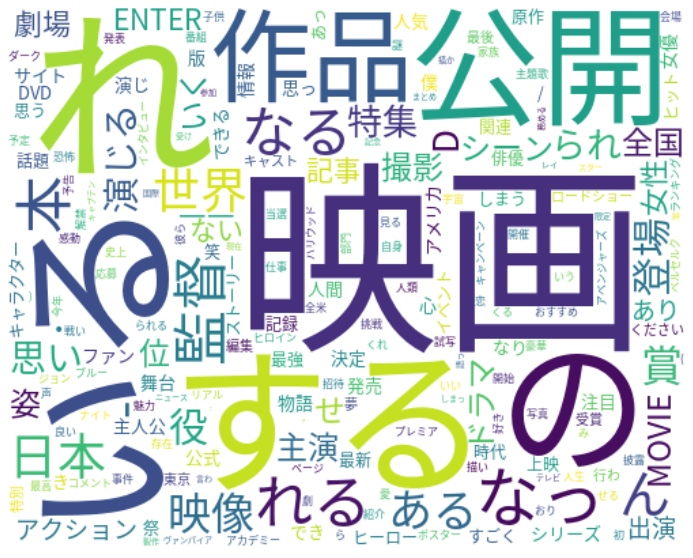

In [46]:
wordcloud(df, 'movie-enter')

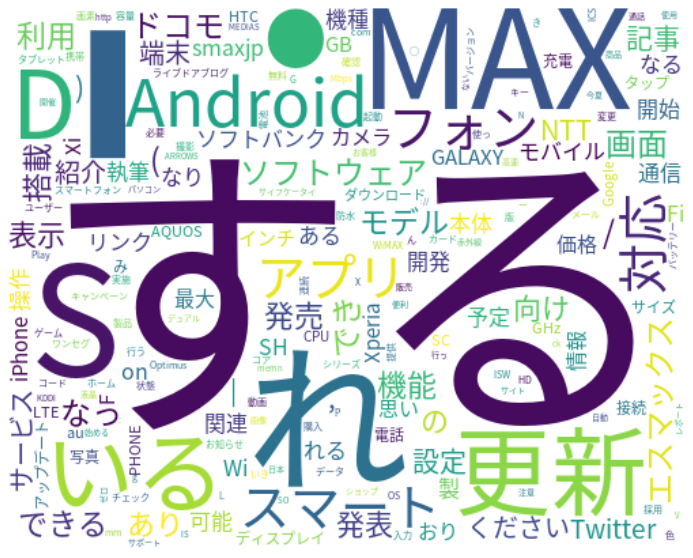

In [47]:
wordcloud(df, 'smax')

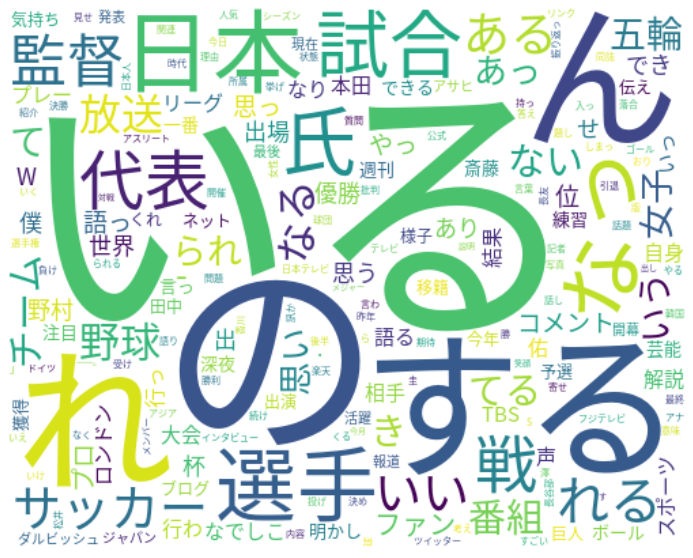

In [48]:
wordcloud(df, 'sports-watch')

In [35]:
# PCAを行ってプロットする
df['pca'] = df['wakati_text'].pipe(hero.tfidf).pipe(hero.pca)
hero.scatterplot(df, 'pca', color='topic', title='topic')